In [1]:
#import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress
from pprint import pprint
import scipy.stats as stats

#file locations
#data file
csv_file_2016 ="CENSUS_and_POPULATION_FINAL_2016.csv"

##NOTES###
#this dataset doesn't include Alaska,all counties were removed bc county names didn't match**
##Lousiana, also**
##It DOES include DC, and counts it as a state**





In [2]:
#read CSV files
analysis_data_2016= pd.read_csv(csv_file_2016)
analysis_data_2016

,Location,County,State,State_Code,Party,Candidate,Total_Votes,County_Pop_2016
0,"Alabama, Autauga",Autauga,Alabama,AL,democrat,Hillary Clinton,24973,"55,243"
1,"Alabama, Autauga",Autauga,Alabama,AL,republican,Donald Trump,24973,"55,243"
2,"Alabama, Baldwin",Baldwin,Alabama,AL,democrat,Hillary Clinton,95215,"207,601"
3,"Alabama, Baldwin",Baldwin,Alabama,AL,republican,Donald Trump,95215,"207,601"
4,"Alabama, Barbour",Barbour,Alabama,AL,democrat,Hillary Clinton,10469,"25,806"
...,...,...,...,...,...,...,...,...
5989,"Wyoming, Uinta",Uinta,Wyoming,WY,republican,Donald Trump,8470,"20,682"
5990,"Wyoming, Washakie",Washakie,Wyoming,WY,democrat,Hillary Clinton,3814,"8,165"
5991,"Wyoming, Washakie",Washakie,Wyoming,WY,republican,Donald Trump,3814,"8,165"
5992,"Wyoming, Weston",Weston,Wyoming,WY,democrat,Hillary Clinton,3526,"7,220"


In [3]:
#removing commas from County Population Data
analysis_data_2016["County_Pop_2016"] = analysis_data_2016["County_Pop_2016"].str.replace(",","").astype(float)


In [4]:
analysis_data_2016["Avg_Turnout"] = (analysis_data_2016.Total_Votes / analysis_data_2016.County_Pop_2016)
analysis_data_2016

,Location,County,State,State_Code,Party,Candidate,Total_Votes,County_Pop_2016,Avg_Turnout
0,"Alabama, Autauga",Autauga,Alabama,AL,democrat,Hillary Clinton,24973,55243.0,0.452057
1,"Alabama, Autauga",Autauga,Alabama,AL,republican,Donald Trump,24973,55243.0,0.452057
2,"Alabama, Baldwin",Baldwin,Alabama,AL,democrat,Hillary Clinton,95215,207601.0,0.458644
3,"Alabama, Baldwin",Baldwin,Alabama,AL,republican,Donald Trump,95215,207601.0,0.458644
4,"Alabama, Barbour",Barbour,Alabama,AL,democrat,Hillary Clinton,10469,25806.0,0.405681
...,...,...,...,...,...,...,...,...,...
5989,"Wyoming, Uinta",Uinta,Wyoming,WY,republican,Donald Trump,8470,20682.0,0.409535
5990,"Wyoming, Washakie",Washakie,Wyoming,WY,democrat,Hillary Clinton,3814,8165.0,0.467116
5991,"Wyoming, Washakie",Washakie,Wyoming,WY,republican,Donald Trump,3814,8165.0,0.467116
5992,"Wyoming, Weston",Weston,Wyoming,WY,democrat,Hillary Clinton,3526,7220.0,0.488366


In [5]:
# 1. What is the overall average voter turnout for 2004 per (((state))), and per county
State_Avg_Turnout = round((analysis_data_2016.groupby('State_Code')['Avg_Turnout'].mean() * 100), 2)

State_Avg_Voter_Turnout = pd.DataFrame(State_Avg_Turnout)
State_Avg_Voter_Turnout_1 = State_Avg_Voter_Turnout.reset_index()
State_Avg_Voter_Turnout_1


,State_Code,Avg_Turnout
0,AL,45.37
1,AR,38.02
2,AZ,41.58
3,CA,39.88
4,CO,53.65
5,CT,47.86
6,DC,45.39
7,DE,46.12
8,FL,46.60
9,GA,39.47


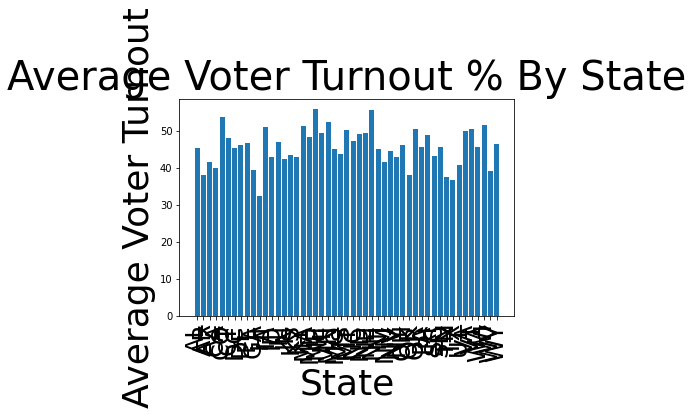

In [6]:
#Bar Graph

Avg_Turnout = State_Avg_Voter_Turnout_1["Avg_Turnout"]
State =  State_Avg_Voter_Turnout_1["State_Code"]
plt.bar(State, Avg_Turnout)
plt.title('Average Voter Turnout % By State', fontsize=40)
plt.xlabel('State', fontsize=36)
plt.ylabel('Average Voter Turnout', fontsize=36)
plt.xticks(rotation=90, fontsize=24)
plt.rcParams["figure.figsize"] = [30, 20]
plt.savefig('Avg_Voter_State_2016.png')
plt.show()

In [7]:
# 1. What is the overall average voter turnout for 2016 per state, and per (((county)))
County_Avg_Turnout = round((analysis_data_2016.groupby('Location')['Avg_Turnout'].mean() * 100), 2)
County_Avg_Turnout

County_Avg_Voter_Turnout = pd.DataFrame(County_Avg_Turnout)
County_Avg_Voter_Turnout_1 = County_Avg_Voter_Turnout.reset_index()

In [8]:
Sample_County = County_Avg_Voter_Turnout_1.sample(n = 50)
Sample_County

,Location,Avg_Turnout
948,"Kansas, Smith",55.85
1281,"Minnesota, Renville",52.05
2821,"Washington, Grays Harbor",39.66
54,"Alabama, Pike",39.35
957,"Kansas, Washington",49.69
1496,"Missouri, Worth",51.91
1895,"North Dakota, Burke",47.24
1971,"Ohio, Guernsey",42.23
2472,"Texas, Crane",28.96
1856,"North Carolina, Orange",57.66


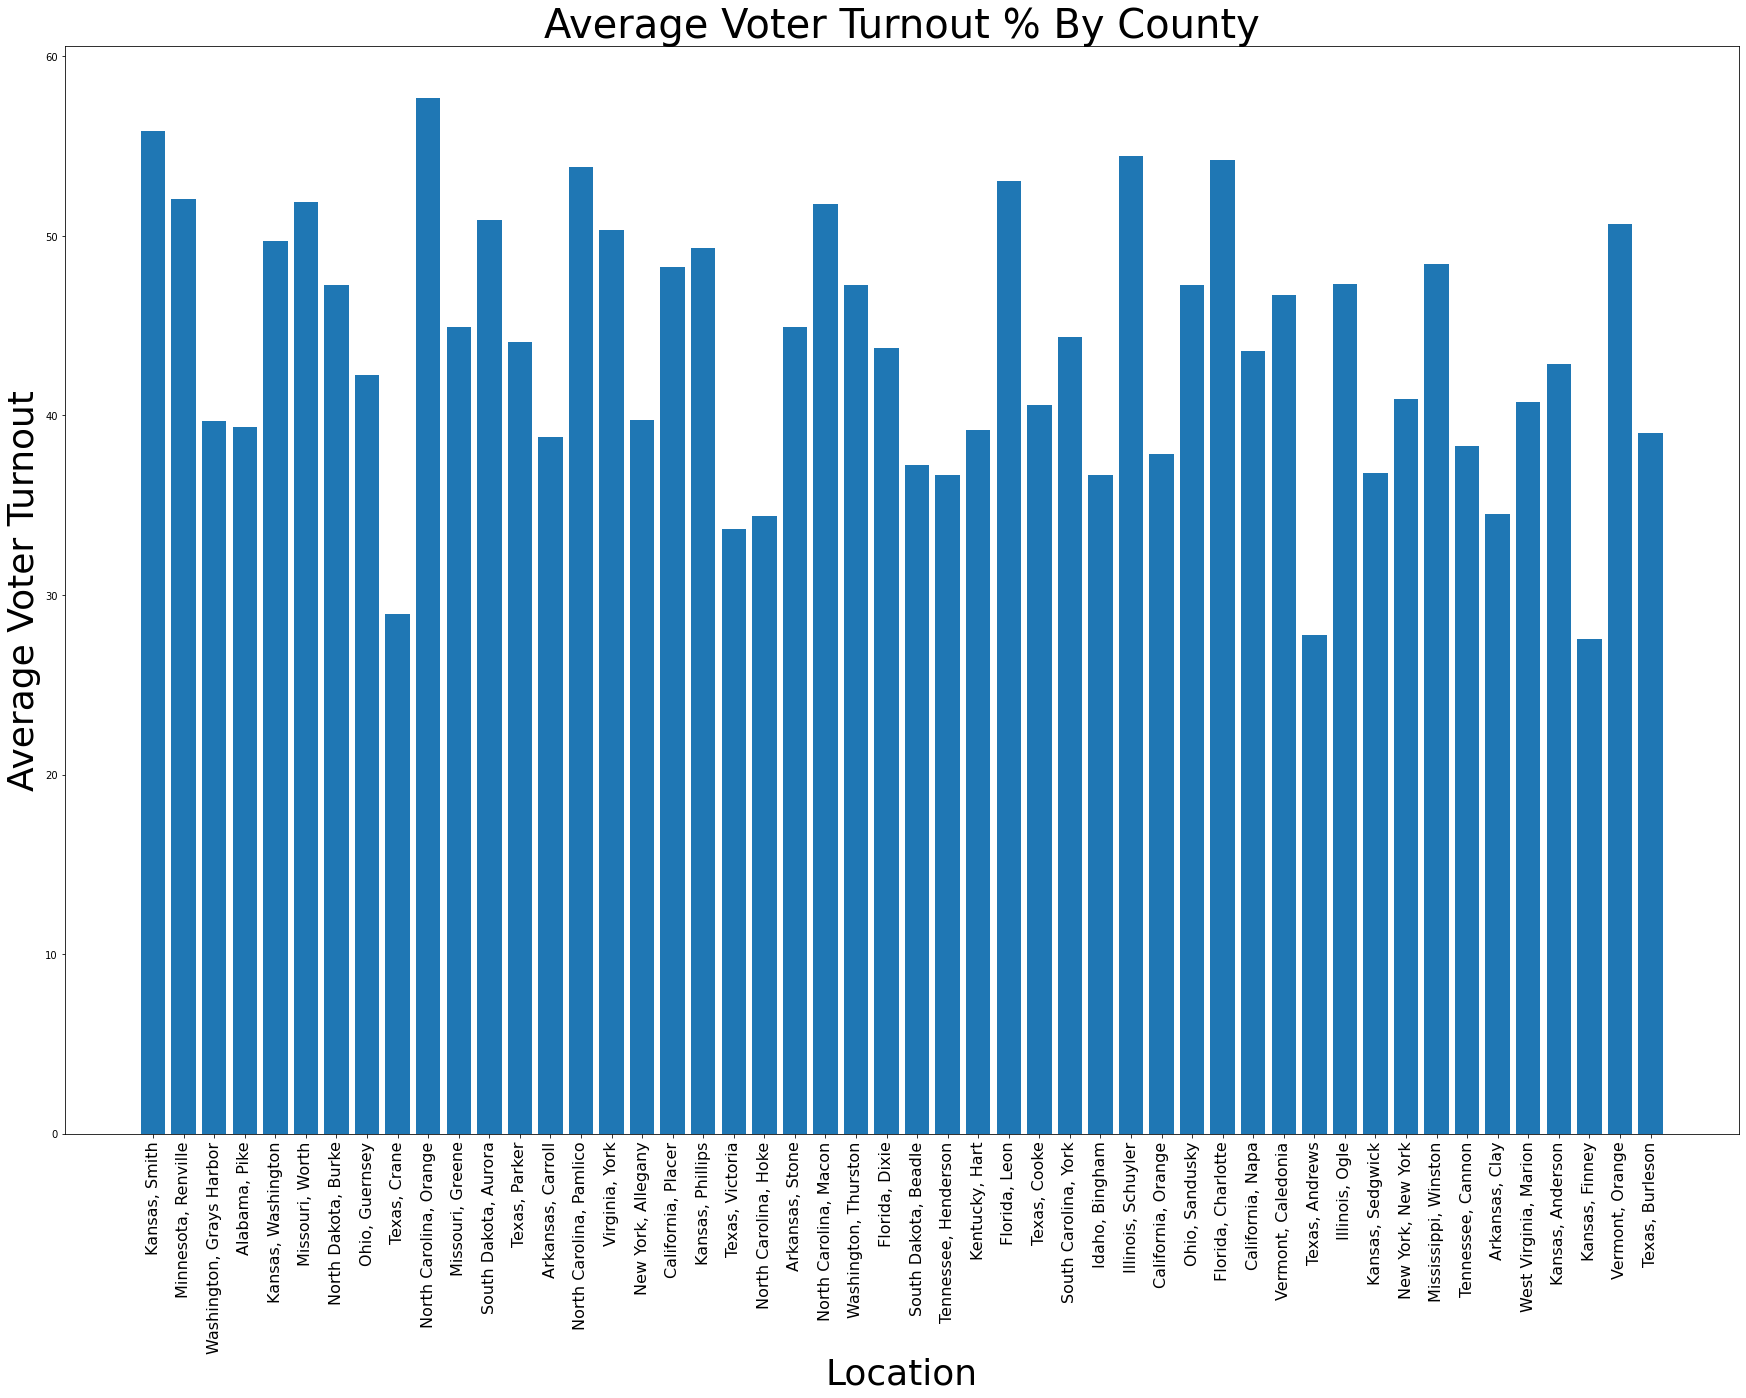

In [9]:
Avg_County_Turnout = Sample_County["Avg_Turnout"]
Location =  Sample_County["Location"]
plt.bar(Location, Avg_County_Turnout)
plt.title('Average Voter Turnout % By County', fontsize=40)
plt.xlabel('Location', fontsize=36)
plt.ylabel('Average Voter Turnout', fontsize=36)
plt.xticks(rotation=90, fontsize=16)
plt.rcParams["figure.figsize"] = [30, 20]
plt.savefig('Avg_Voter_County_2016.png')

plt.show()

In [10]:
Pop_County = County_Avg_Voter_Turnout_1['Avg_Turnout']
Sample_County = Sample_County["Avg_Turnout"]

stats.ttest_1samp(Sample_County, Pop_County.mean())

Ttest_1sampResult(statistic=-0.7773801400358433, pvalue=0.44067167911157856)

In [11]:
#5. Are there any outliers?
county_outliers = County_Avg_Voter_Turnout_1['Avg_Turnout']

quartiles = county_outliers.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of county_outliers is: {lowerq}")
print(f"The upper quartile of county_outliers is: {upperq}")
print(f"The interquartile range of county_outliers is: {iqr}")
print(f"The the median of county_outliers is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



The lower quartile of county_outliers is: 39.6
The upper quartile of county_outliers is: 49.95
The interquartile range of county_outliers is: 10.350000000000001
The the median of county_outliers is: 44.68 
Values below 24.075 could be outliers.
Values above 65.47500000000001 could be outliers.
